# Exercise: Epochs in Model Training


`#scikit-learn` `#epochs` `#SGDRegressor` `#overfitting`


> Objectives:
>
> - Understand the concept of epochs in machine learning
> - Use Scikit-Learn to simulate training over multiple epochs
> - Visualize model performance over time
> - Recognize overfitting when training for too many epochs


## Standard Deep Atlas Exercise Set Up


- [x] Ensure you are using the coursework Pipenv environment and kernel ([instructions](../SETUP.md))
- [x] Apply the standard Deep Atlas environment setup process by running this cell:


In [1]:
import sys, os
sys.path.insert(0, os.path.join('..', 'includes'))

import deep_atlas
from deep_atlas import FILL_THIS_IN
deep_atlas.initialize_environment()
if deep_atlas.environment == 'COLAB':
    %pip install -q python-dotenv==1.0.0

🎉 Running in a Virtual environment


## 🚦 Checkpoint: Start

- [ ] Run this cell to record your start time:


In [2]:
deep_atlas.log_start_time()

🚀 Success! Get started...


## Context


An **epoch** refers to one complete pass through the entire training dataset. In iterative training processes, such as those used in gradient descent algorithms, the model’s parameters are updated multiple times over multiple epochs to improve performance.

In this exercise, we will explore how training a model over multiple epochs affects its performance and how training for too many epochs can lead to overfitting.


## Imports


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import helpers

## Data Preparation


Let's create a simple linear regression dataset with some noise to illustrate the concept of epochs.

- [x] Generate the synthetic dataset:
  - To simulate a simple regression problem, we will work with one input feature and one output per data point.
  - Use SciKit-Learn's `make_regression` utility to produce 200 samples:


In [5]:
# Create a synthetic regression dataset
input_features, outputs = make_regression(
    n_samples=200, n_features=1, noise=10, random_state=42
)

<details>
<summary>Solution:</summary>

```py
input_features, outputs = make_regression(
    n_samples=200, n_features=1, noise=10, random_state=42
)
```

</details>


- [x] Split the dataset into training (80%) and validation sets (20%), to assess how training improves over time:


In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    input_features, outputs, test_size=0.2, random_state=42
)

<details>
<summary>Solution:</summary>

```py
X_train, X_val, y_train, y_val = train_test_split(
    input_features, outputs, test_size=0.2, random_state=42
)
```

</details>


- [x] Visualize the dataset:
  - Training samples are in blue, and validation samples are in red
  - Feature values are plotted along the x-axis
  - Target labels are plotted along the y-axis
  - Note the linear relationship between inputs and outputs.


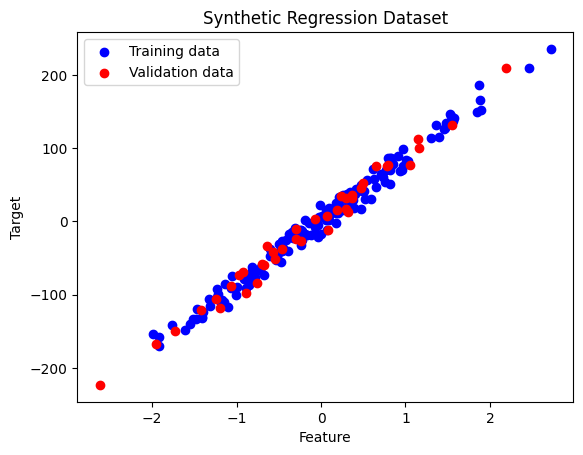

In [8]:
# Visualize the data
plt.scatter(X_train, y_train, color="blue", label="Training data")
plt.scatter(X_val, y_val, color="red", label="Validation data")
plt.title("Synthetic Regression Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

## Model Initialization


We'll use `SGDRegressor` from Scikit-Learn, which uses stochastic gradient descent to iteratively update the model’s parameters.

> Note: SGD's iterative optimization allows us to experiment with and visualize training over time.
>
> Other shallow algorithms (e.g. LinearRegression) do _not_ iteratively update parameters; instead they get fit algebraically, all at once to the training data. Epoch-based training is not applicable in those cases.
>
> In contrast, deep learning neural networks — due to the fact that they have many more parameters and model arbitrarily complex functions — are trained iteratively with multiple epochs.

- [x] Initialize the model:
  - The `SGDRegressor` constructor accepts a named `learning_rate` argument, which will specify how to adjust the amount by which internal parameters are updated.
  - Set this argument to `"constant"` (no adjustment)


In [10]:
model = SGDRegressor(learning_rate="constant", random_state=42)

<details>
<summary>Solution:</summary>

```py
model = SGDRegressor(learning_rate="constant", random_state=42)
```

</details>


## Example 1: Training on a single sample


First, let's see how training on a single sample affects the model.

- [x] Select a single data point to train on (input feature and label)


In [11]:
single_sample_X = X_train[:1]
single_sample_y = y_train[:1]

- [x] Partially fit the model on the single sample:
  - Pass in the training data are the first argument and the expected label as the second.


In [13]:
model.partial_fit(single_sample_X, single_sample_y)

SGDRegressor(learning_rate='constant', random_state=42)

<details>
<summary>Solution:</summary>

```py
model.partial_fit(single_sample_X, single_sample_y)
```

</details>


- [x] Perform inference on this model using the entire validation set:
  - Although we trained the model with a single sample, we want to use the entire validation set for evaluation, because that will tell us how this model will perform — on average — on unseen data.


In [15]:
predictions = model.predict(X_val)

<details>
<summary>Solution:</summary>

```py
predictions = model.predict(X_val)
```

</details>


- [x] Calculate the cost of the model (the aggregate of individual losses)
  - "loss" refers to difference between the expected and predicted values, for a single validation sample.
  - "cost" refers to the average of all the losses.
  - Because losses can be positive or negative, it is best to use absolute values, either by using the absolute function or squaring the values.
    - When using the squaring technique, the resulting cost function is referred to as the _Mean Squared Error (MSE)_.
    - When using absolute, the cost function is _Mean Absolute Error (MAE)_.
    - Note that MSE will highlight large / outlier losses, which may affect the optimization of your parameters.


In [16]:
initial_cost = np.mean((predictions - y_val) ** 2)
print(f"Initial Loss after one sample: {initial_cost:.2f}")

Initial Loss after one sample: 653.82


- [ ] We can also visualize the prediction line by plugging in all possible input values and seeing the line produced by the model's outputs.


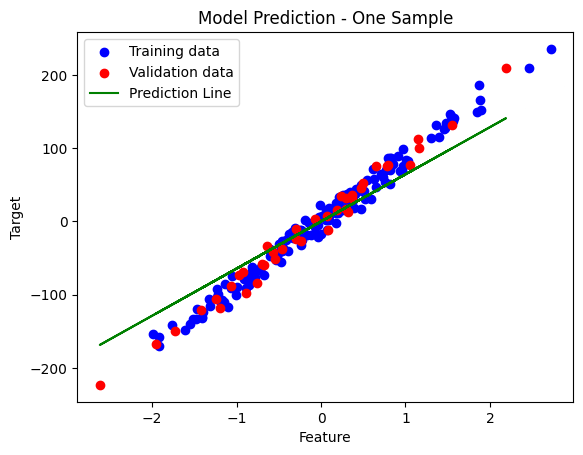

In [17]:
# Visualize the prediction line
helpers.plot_predictions(
    X_train, y_train, X_val, y_val, predictions, description="One Sample"
)

Note how far the line is from accurately modeling the data and minimizing losses — in fact, it only predicts 0. We can improve the model by showing it more than one sample...


## Example 2: Training on a single epoch (all samples, once)


Now, train the model for one complete pass through the dataset.

- [x] Train the model over one epoch (all of the sample in the training set):


In [18]:
for i in range(len(X_train)):
    model.partial_fit(X_train[i : i + 1], y_train[i : i + 1])

<details>
<summary>Solution:</summary>

```py
for i in range(len(X_train)):
    model.partial_fit(X_train[i : i + 1], y_train[i : i + 1])
```

</details>


- [x] As before, let's perform validation by running inference on the validation set.


In [19]:
predictions = model.predict(X_val)

- [x] Calculate the losses after one epoch of training and visualize the prediction line.


Cost after one epoch: 158.20


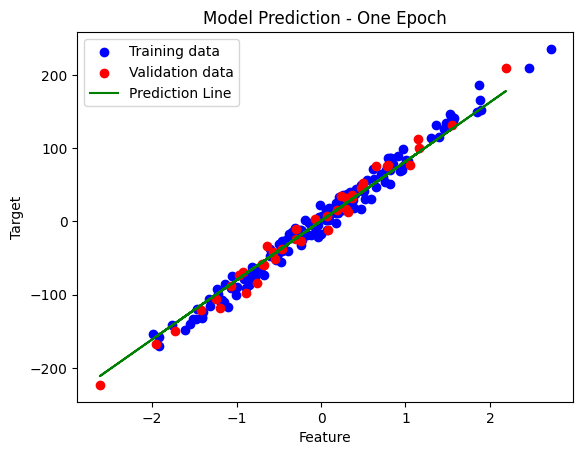

In [20]:
# Calculate the loss after one epoch
cost_after_one_epoch = np.mean((predictions - y_val) ** 2)
print(f"Cost after one epoch: {cost_after_one_epoch:.2f}")

# Visualize the updated prediction line
helpers.plot_predictions(
    X_train, y_train, X_val, y_val, predictions, description="One Epoch"
)

We can see the model is beginning to approximate the distribution of the data.


## Example 3: Training with multiple epochs


Next, we'll train the model for multiple epochs and visualize how the performance changes.

- [x] In order to track how the performance of the model changes across epochs, let's initialize two empty lists which will store training and validation costs:


In [21]:
training_cost = []
validation_cost = []

<details>
<summary>Solution:</summary>

```py
training_cost = []
validation_cost = []
```

</details>


- [x] Implement the training loop to train over multiple epochs:
  - Set a number of epochs to train for: start with 3


In [22]:
num_epochs = 3
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        model.partial_fit(X_train[i : i + 1], y_train[i : i + 1])

    # Perform predictions using the updated model
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)

    # Calculate training and validation cost at each epoch
    train_cost = np.mean((train_predictions - y_train) ** 2)
    val_cost = np.mean((val_predictions - y_val) ** 2)

    # Append the cost values to the lists
    training_cost.append(train_cost)
    validation_cost.append(val_cost)

    # For each epoch, print the training and validation costs
    print(
        f"Epoch {epoch+1} - Training cost: {train_cost:.2f}, Validation cost: {val_cost:.2f}"
    )

Epoch 1 - Training cost: 102.66, Validation cost: 116.59
Epoch 2 - Training cost: 100.28, Validation cost: 111.53
Epoch 3 - Training cost: 99.99, Validation cost: 110.60


<details>
<summary>Solution:</summary>

```py
num_epochs = 3
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        model.partial_fit(X_train[i : i + 1], y_train[i : i + 1])

    # ...
```

</details>


- [x] Finally, plot the cost over time:


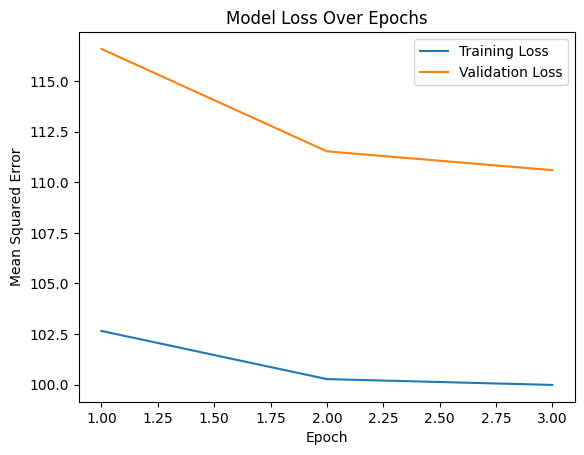

In [23]:
helpers.plot_cost_over_epochs(training_cost, validation_cost, num_epochs)

Note how the the cost (error) goes down over time, as the model learns how the data is arranged.

- [x] Additionally, visualize how close the model is to approximating the data:


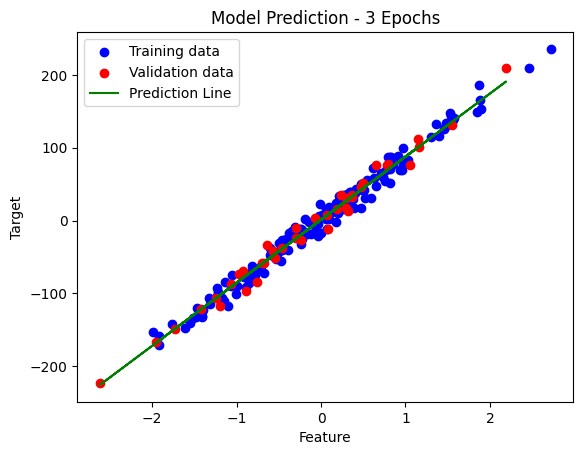

In [24]:
predictions = model.predict(X_val)
helpers.plot_predictions(
    X_train, y_train, X_val, y_val, predictions, description="3 Epochs"
)

Our model's approximation is very close to the data itself!


## Overfitting (too many epochs)


Observe what happens when training continues for too many epochs. The validation cost hits a plateau (and may even start to increase!), indicating overfitting.

- [x] Continue training to illustrate overfitting:


Epoch 4 - Training cost: 99.94, Validation cost: 110.39
Epoch 5 - Training cost: 99.92, Validation cost: 110.33
Epoch 6 - Training cost: 99.92, Validation cost: 110.32
Epoch 7 - Training cost: 99.92, Validation cost: 110.31
Epoch 8 - Training cost: 99.92, Validation cost: 110.31
Epoch 9 - Training cost: 99.92, Validation cost: 110.31
Epoch 10 - Training cost: 99.92, Validation cost: 110.31


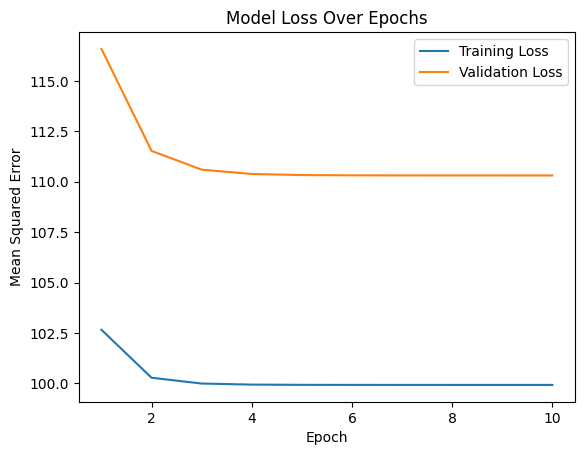

In [25]:
additional_epochs = 7
total_epochs = num_epochs + additional_epochs

for epoch in range(additional_epochs):
    for i in range(len(X_train)):
        model.partial_fit(X_train[i : i + 1], y_train[i : i + 1])

    # Calculate training and validation cost at each epoch
    train_predictions = model.predict(X_train)
    val_predictions = model.predict(X_val)
    train_cost = np.mean((train_predictions - y_train) ** 2)
    val_cost = np.mean((val_predictions - y_val) ** 2)

    training_cost.append(train_cost)
    validation_cost.append(val_cost)

    print(
        f"Epoch {num_epochs + epoch+1} - Training cost: {train_cost:.2f}, Validation cost: {val_cost:.2f}"
    )

# Visualize the extended cost over epochs
helpers.plot_cost_over_epochs(training_cost, validation_cost, total_epochs)

Takeaway: Choosing an appropriate number of epochs is crucial for balancing the following:

1. The cost of training
   - Fewer epochs are preferred
2. Model performance
   - More epochs = more optimization to reduce loss
3. Generalizability
   - Cutting off training when validation loss becomes stagnant, volatile, or begins increasing (indicating overfitting).


### 🚦 Checkpoint: Stop


- [x] Uncomment this code
- [x] Complete the feedback form
- [x] Run the cell to log your responses and record your stop time:


In [29]:
# deep_atlas.log_feedback(
#     {
#         # How long were you actively focused on this section? (HH:MM)
#         "active_time": 00:20,
#         # Did you feel finished with this section (Yes/No):
#         "finished": yes,
#         # How much did you enjoy this section? (1–5)
#         "enjoyment": 4,
#         # How useful was this section? (1–5)
#         "usefulness": 4,
#         # Did you skip any steps?
#         "skipped_steps": no,
#         # Any obvious opportunities for improvement?
#         "suggestions": [],
#     }
# )
# deep_atlas.log_stop_time()



## You did it!


In this exercise, we explored how training a model over multiple epochs affects its performance. We demonstrated how an appropriate number of epochs leads to improved model performance, while too many epochs can cause overfitting.

By understanding the role of epochs in model training, you'll be better equipped to manage model training processes and prevent overfitting in future projects.
